Step 1: Import Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc


Step 2: Load Titanic Dataset

In [2]:
# Load Titanic dataset directly from seaborn
import pandas as pd

data = pd.read_csv('/content/2025-07-04T13-24-57.561Z-diabetes (1).csv')

In [3]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


Step 3: Basic Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Step 4: Exploratory Data Analysis (EDA)

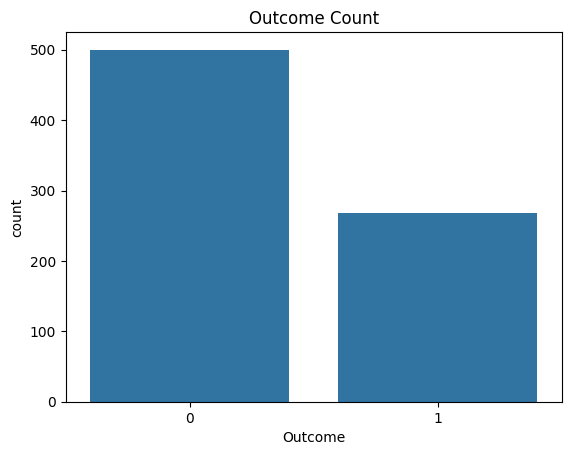

In [7]:
import seaborn as sns

sns.countplot(x='Outcome', data=data)
plt.title('Outcome Count')
plt.show()

Age Distribution

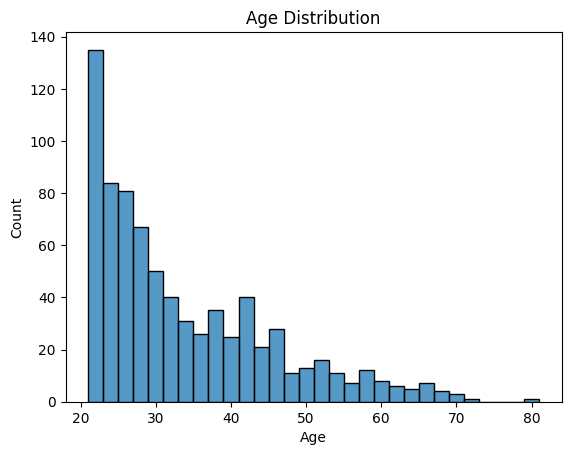

In [8]:
sns.histplot(data['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

Outcome by Age Group

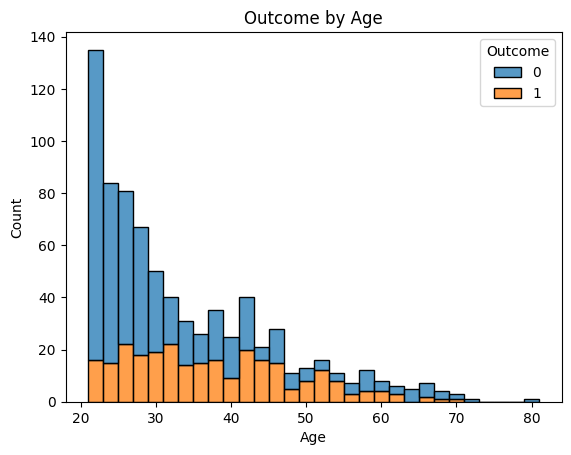

In [9]:
sns.histplot(data=data, x='Age', hue='Outcome', multiple='stack', bins=30)
plt.title('Outcome by Age')
plt.show()

Heatmap for correlation

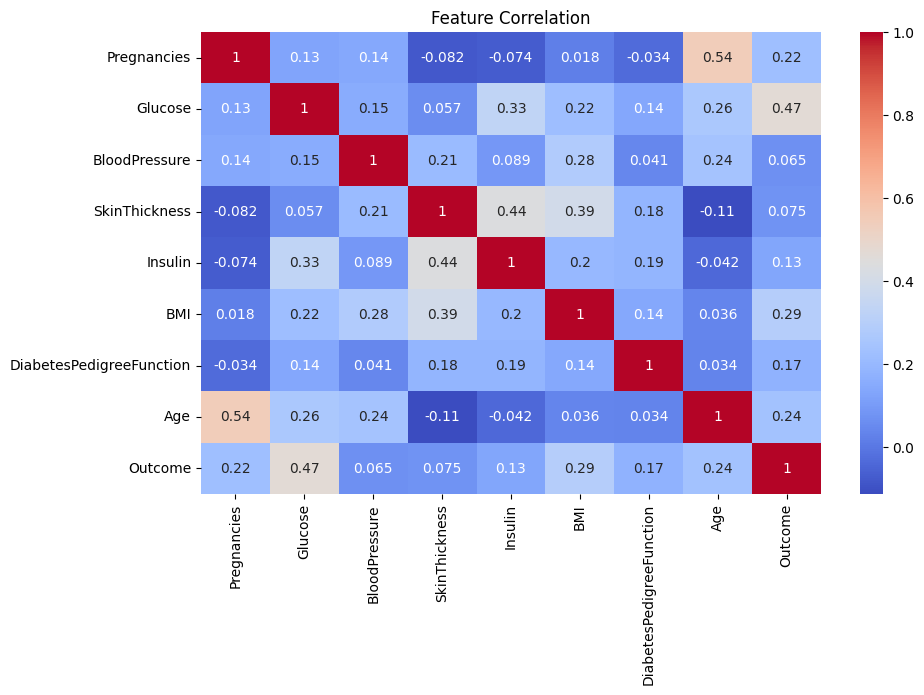

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

Step 5: Train-Test Split

✨ Feature Scaling

In [11]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Data:")
display(X_train_scaled.head())

print("\nScaled Test Data:")
display(X_test_scaled.head())

Scaled Training Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095



Scaled Test Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
324,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
624,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
690,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
473,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101


In [13]:
print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)

Training Data Shape: (614, 8)
Testing Data Shape: (154, 8)


Logistic Regression

In [14]:
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train_scaled, y_train)
pred_log = model_log.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_log))
print(classification_report(y_test, pred_log))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Evaluation Code:

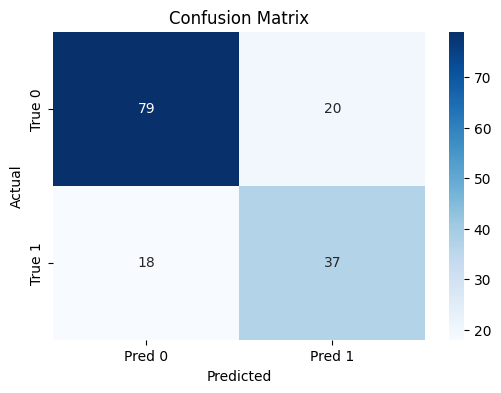

Precision: 0.65
Recall:    0.67
F1 Score:  0.66


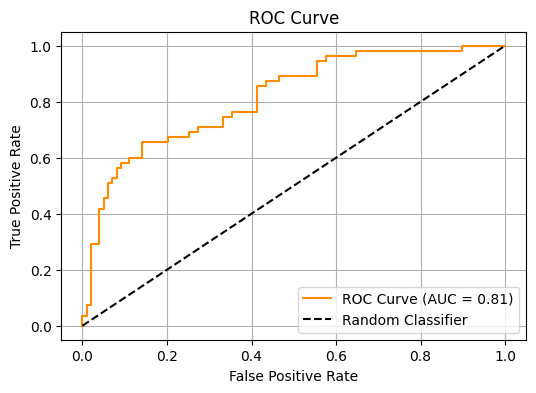

In [24]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Precision, Recall, F1-Score (print individually)
precision = precision_score(y_test, pred_log)
recall = recall_score(y_test, pred_log)
f1 = f1_score(y_test, pred_log)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

# 3. ROC Curve & AUC
y_prob = model_log.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


K-Nearest Neighbors (KNN)

In [16]:
model_knn = KNeighborsClassifier(n_neighbors=18)
model_knn.fit(X_train_scaled, y_train)
pred_knn = model_knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



Choosing the right K:

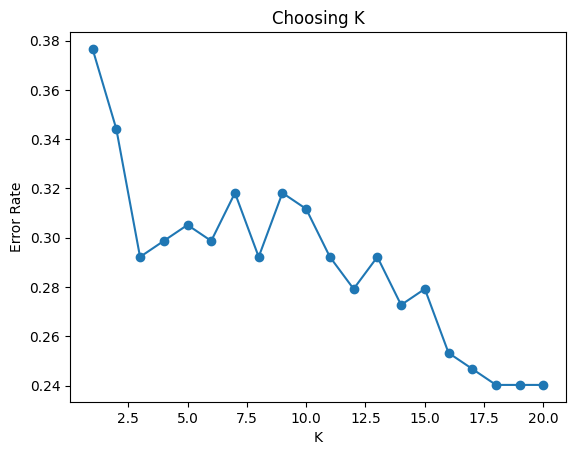

In [17]:
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

Evaluation Code:

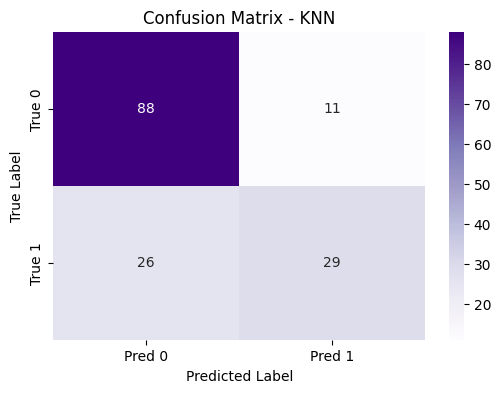

Precision: 0.72
Recall:    0.53
F1 Score:  0.61


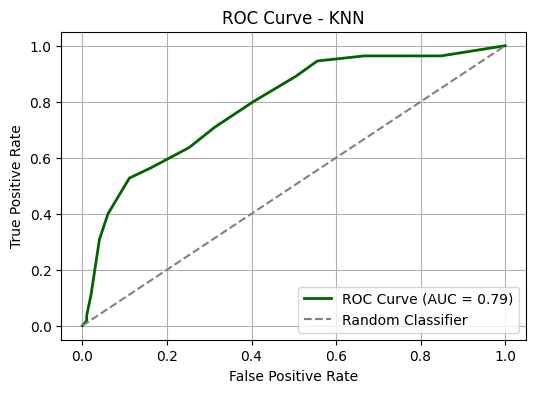

In [25]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Precision, Recall, F1-Score
precision = precision_score(y_test, pred_knn)
recall = recall_score(y_test, pred_knn)
f1 = f1_score(y_test, pred_knn)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

# 3. ROC Curve & AUC
# For KNN, get predicted probabilities (class 1)
y_prob_knn = model_knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


 Decision Trees

Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



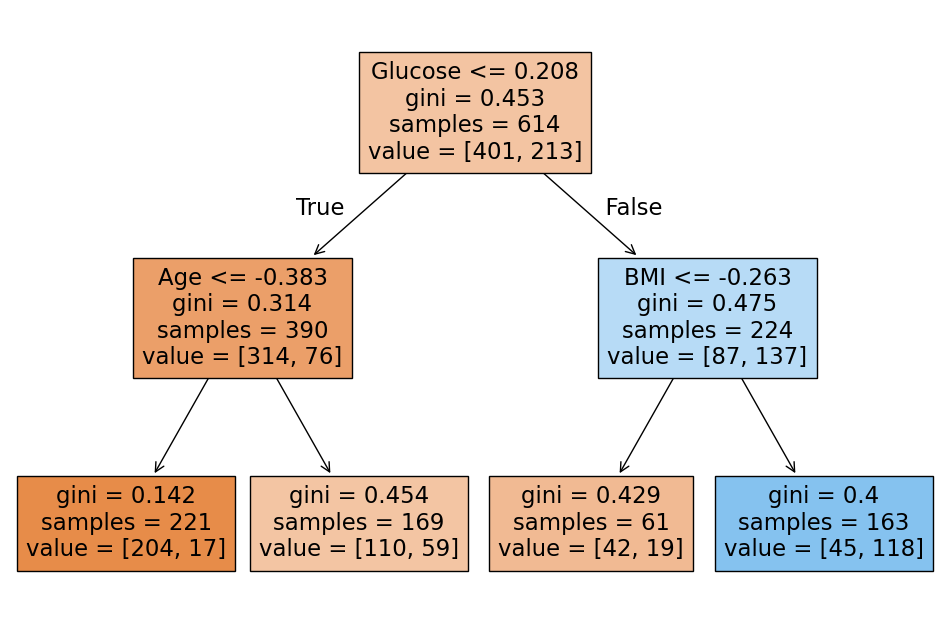

In [19]:
model_tree = DecisionTreeClassifier(max_depth=2)
model_tree.fit(X_train_scaled, y_train)
pred_tree = model_tree.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

# Visualize Tree
plt.figure(figsize=(12,8))
plot_tree(model_tree, filled=True, feature_names=X.columns)
plt.show()

Evaluation Code:

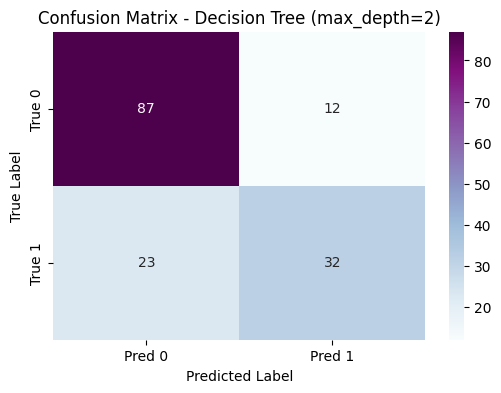

Evaluation Metrics - Decision Tree (max_depth=2):
Precision: 0.73
Recall:    0.58
F1 Score:  0.65


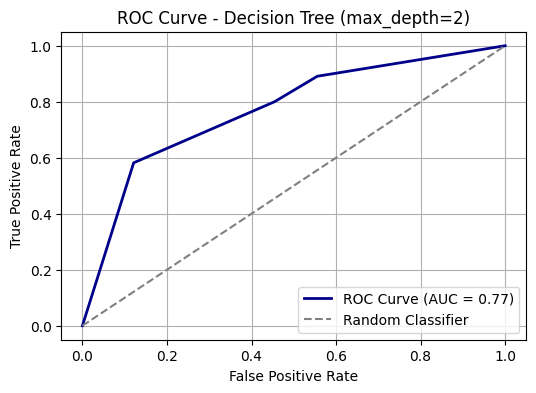

In [26]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix - Decision Tree (max_depth=2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Precision, Recall, F1-Score
precision = precision_score(y_test, pred_tree)
recall = recall_score(y_test, pred_tree)
f1 = f1_score(y_test, pred_tree)

print("Evaluation Metrics - Decision Tree (max_depth=2):")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

# 3. ROC Curve & AUC
y_prob_tree = model_tree.predict_proba(X_test_scaled)[:, 1]  # probability of class 1

fpr, tpr, _ = roc_curve(y_test, y_prob_tree)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (max_depth=2)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


 Random Forest Classifier

In [21]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



Evaluation Code:

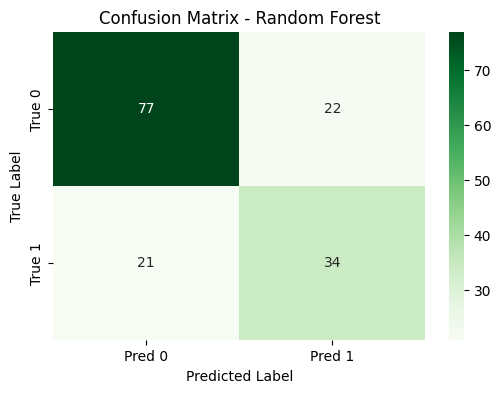

Evaluation Metrics - Random Forest:
Precision: 0.61
Recall:    0.62
F1 Score:  0.61


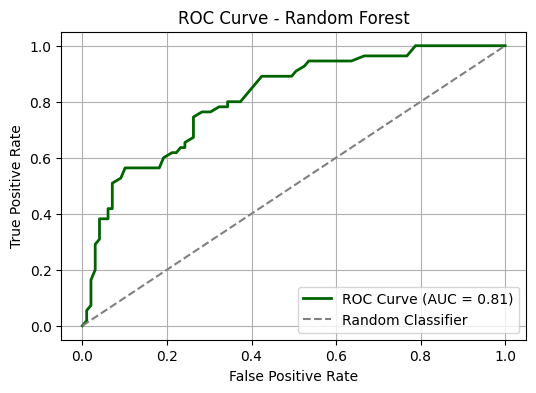

In [27]:

# 1. Confusion Matrix
cm = confusion_matrix(y_test, pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Precision, Recall, F1-Score
precision = precision_score(y_test, pred_rf)
recall = recall_score(y_test, pred_rf)
f1 = f1_score(y_test, pred_rf)

print("Evaluation Metrics - Random Forest:")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

# 3. ROC Curve & AUC
y_prob_rf = model_rf.predict_proba(X_test_scaled)[:, 1]  # probability of class 1

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
